Danish Deepak

## Project 17 : Predict adaptibility of online education

In [1]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset 
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


### 1) Data Exploration

In [3]:
# Checking the dtypes and null values in every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [4]:
# All the columns consists data of dtype object
# There are 1205 rows and no columns has any null values

In [5]:
# Basic statistical analysis
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [6]:
# Each column has very less amount of unique values so lets look into them next

In [7]:
for i in df.columns:
    print(f'{i} : {df[i].unique()}')
    print('-'*50)

Gender : ['Boy' 'Girl']
--------------------------------------------------
Age : ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
--------------------------------------------------
Education Level : ['University' 'College' 'School']
--------------------------------------------------
Institution Type : ['Non Government' 'Government']
--------------------------------------------------
IT Student : ['No' 'Yes']
--------------------------------------------------
Location : ['Yes' 'No']
--------------------------------------------------
Load-shedding : ['Low' 'High']
--------------------------------------------------
Financial Condition : ['Mid' 'Poor' 'Rich']
--------------------------------------------------
Internet Type : ['Wifi' 'Mobile Data']
--------------------------------------------------
Network Type : ['4G' '3G' '2G']
--------------------------------------------------
Class Duration : ['3-6' '1-3' '0']
--------------------------------------------------
Self Lms : ['No' 'Yes']
----

In [8]:
# There are no mispelled values in any of the columns so lets move ahead

### 2) Data Visualization

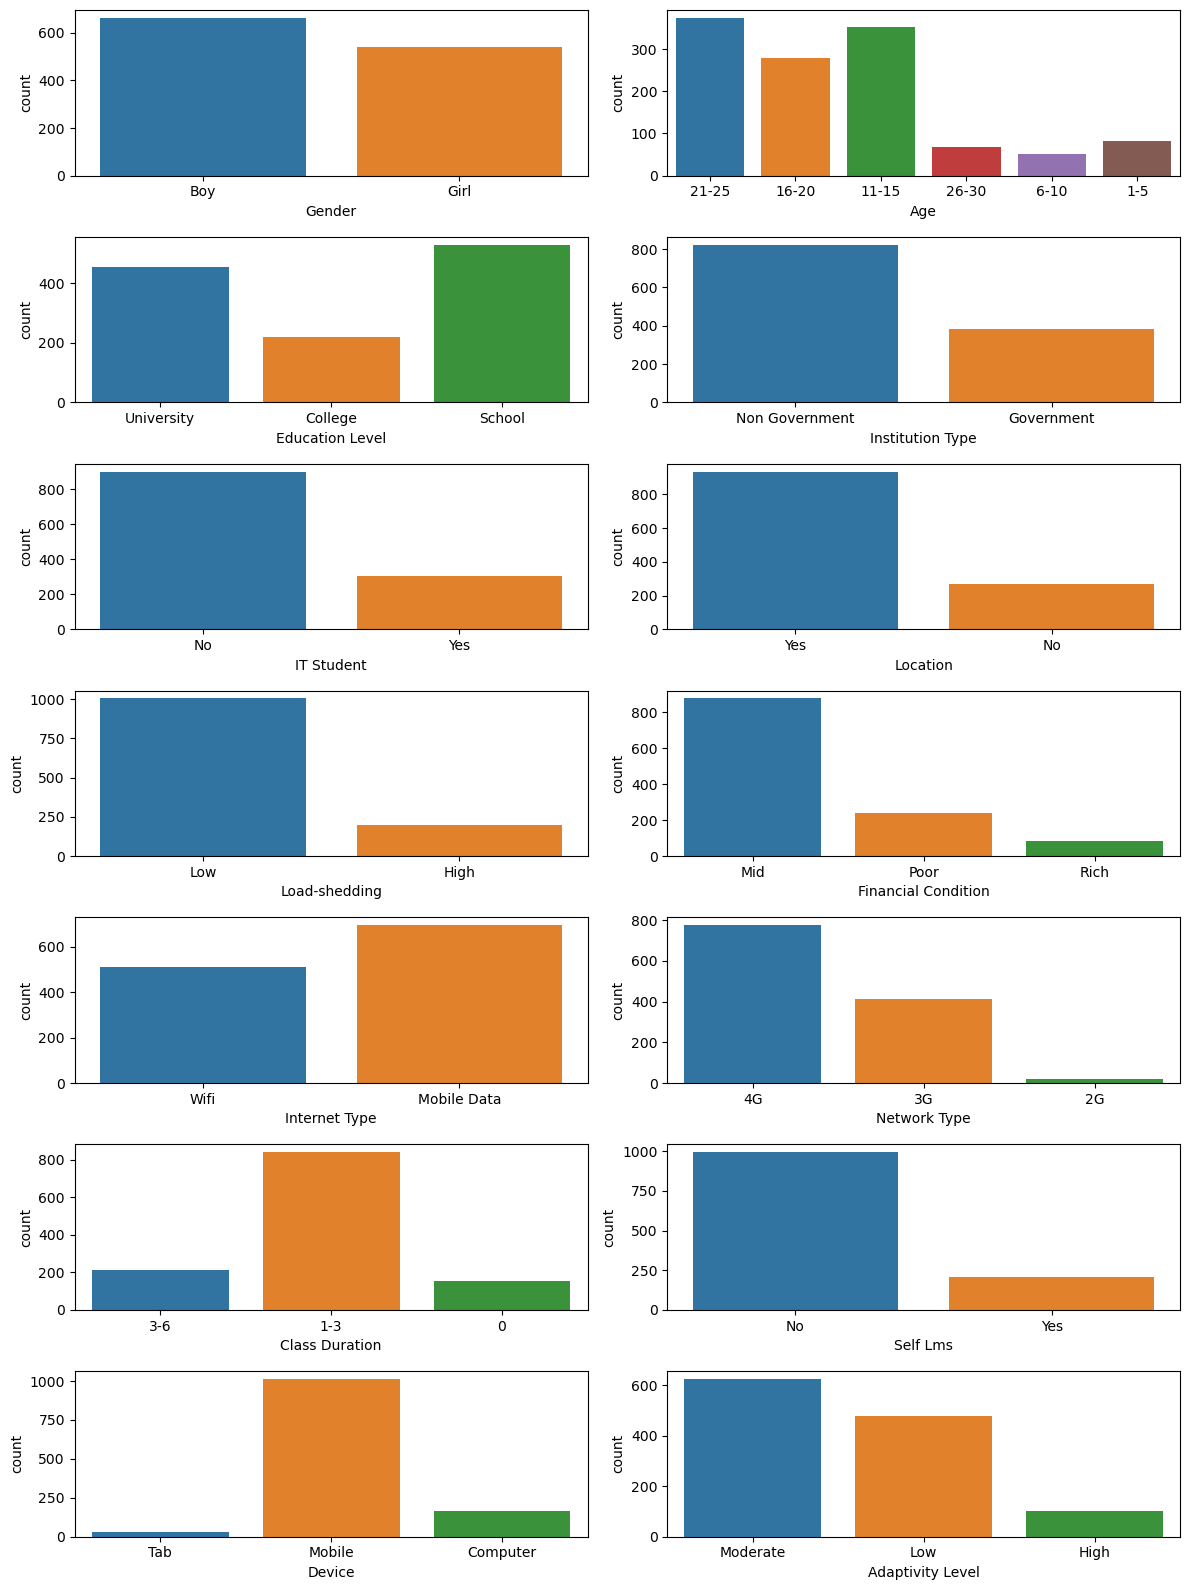

In [9]:
#Visualizing the distribution of each feature
fig, ax = plt.subplots(7, 2, figsize = (12,16))
ax = ax.flatten()

for i, column in enumerate(df.columns):
    sns.countplot(x = column, data = df, ax = ax[i])

plt.tight_layout()

### 3) Data Transformation

In [10]:
# label encoding
le = LabelEncoder()
df_encoded = df.drop('Adaptivity Level', axis = 1).copy()
for column in df_encoded.columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

df_encoded.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,0,3,2,1,0,1,1,0,1,2,2,0,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1
2,1,2,0,0,0,1,1,0,1,2,1,0,1
3,1,1,1,1,0,1,1,0,0,2,1,0,1
4,1,2,1,1,0,1,1,1,0,1,0,0,1


In [11]:
# Scaler transformation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(df_scaled, columns = df_encoded.columns)

df_scaled.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,-0.904155,0.725027,1.112419,0.681290,-0.580864,0.537373,0.447436,-0.565091,1.167367,0.723409,1.737449,-0.459408,2.890610
1,1.106005,0.725027,1.112419,0.681290,-0.580864,0.537373,-2.234955,-0.565091,-0.856629,0.723409,-0.086267,2.176717,0.285386
2,1.106005,-0.101517,-1.657136,-1.467805,-0.580864,0.537373,0.447436,-0.565091,1.167367,0.723409,-0.086267,-0.459408,0.285386
3,1.106005,-0.928062,-0.272359,0.681290,-0.580864,0.537373,0.447436,-0.565091,-0.856629,0.723409,-0.086267,-0.459408,0.285386
4,1.106005,-0.101517,-0.272359,0.681290,-0.580864,0.537373,0.447436,1.087664,-0.856629,-1.218034,-1.909983,-0.459408,0.285386


### 4) Applying multiple classification ML algorithms

In [12]:
# Splitting the data into training and testing sets
X = df_scaled
y = df['Adaptivity Level']

X_train,X_test,y_train,y_test = train_test_split(X , y, test_size = 0.3, random_state = 2)

In [13]:
# Initializing the ML Algorithms

svc = SVC()
rf  = RandomForestClassifier()
knn = KNeighborsClassifier()
dt  = DecisionTreeClassifier()

In [14]:
# Training the models

svc.fit(X_train,y_train)
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
# Predicting the test sets

svc_pred = svc.predict(X_test)
rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)

### 5) Calculating the results for each model

In [16]:
print('Confusion Matrix and accuracy score for SVC')
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, svc_pred))
print('')
print('Accuracy: ', accuracy_score(y_test, svc_pred))

Confusion Matrix and accuracy score for SVC

Confusion Matrix: 
[[ 18   5  13]
 [  0 117  21]
 [  4  25 159]]

Accuracy:  0.8121546961325967


In [17]:
print('Confusion Matrix and accuracy score for RF')
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, rf_pred))
print('')
print('Accuracy: ', accuracy_score(y_test, rf_pred))

Confusion Matrix and accuracy score for RF

Confusion Matrix: 
[[ 22   5   9]
 [  0 132   6]
 [  1  17 170]]

Accuracy:  0.8950276243093923


In [18]:
print('Confusion Matrix and accuracy score for KNN')
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, knn_pred))
print('')
print('Accuracy: ', accuracy_score(y_test, knn_pred))

Confusion Matrix and accuracy score for KNN

Confusion Matrix: 
[[ 16   5  15]
 [  1 116  21]
 [ 11  31 146]]

Accuracy:  0.7679558011049724


In [19]:
print('Confusion Matrix and accuracy score for DT')
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, dt_pred))
print('')
print('Accuracy: ', accuracy_score(y_test, dt_pred))

Confusion Matrix and accuracy score for DT

Confusion Matrix: 
[[ 24   5   7]
 [  3 129   6]
 [  6  18 164]]

Accuracy:  0.8756906077348067


In [20]:
# So I get the best accuracy with the Randome forest classifier

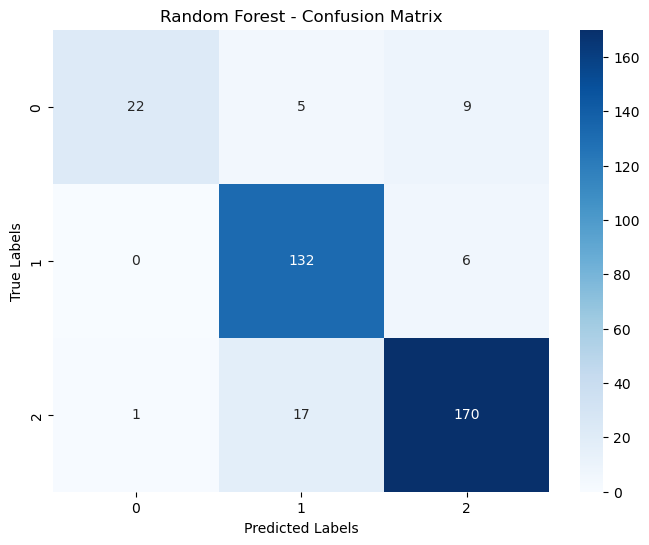

ACCURACY:  0.8950276243093923


In [21]:
cm = confusion_matrix(y_test, rf_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('ACCURACY: ',accuracy_score(y_test, rf_pred))